# Sentiment Analysis of Kenyan Political Tweets

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

raw_dataset = pd.read_csv('/content/drive/MyDrive/kenya_political_tweets.csv')
raw_dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1396091006030856192,Doomster,Utopia slums,"Alt-left, liberal, pronoun:them",2009-08-23 12:22:53,309,907,8050,False,2021-05-22 13:10:08,@PrettyAmmina The change to the new blue unifo...,NaN,Twitter Web App,0.0,0.0,False
1,1395981137764397056,Unruly 🗯,Morayfield,I don't know what you thought this was gonna b...,2011-04-20 19:35:54,1053,523,5279,False,2021-05-22 05:53:33,I think it's now safe to say President Uhuru K...,NaN,Twitter for Android,0.0,0.0,False
2,1395433210490798082,Khavin,Nairobi,CCTV installation and MAINTENANCE technician. ...,2020-02-11 04:52:44,4202,3735,29563,False,2021-05-20 17:36:17,@_CrazyKenyan President Uhuru Kenyatta bribed ...,['bbinonsense'],Twitter Web App,0.0,1.0,False
3,1394739630898044931,Lecturer🇰🇪💥,Eldoret,President Kenyatta's critic.William Samoei Rut...,2020-01-23 19:10:51,774,1467,4150,False,2021-05-18 19:40:15,"As @HonMoses_Kuria has just been saying,Presid...",NaN,Twitter for Android,0.0,0.0,False
4,1394561455471661057,Lecturer🇰🇪💥,Eldoret,President Kenyatta's critic.William Samoei Rut...,2020-01-23 19:10:51,774,1467,4150,False,2021-05-18 07:52:15,David Murathe the KEMSA thief and President Uh...,NaN,Twitter for Android,2.0,1.0,False


Removing null values from the dataset

In [11]:
raw_dataset.isna().any().sum()
dataset_with_no_null_values = raw_dataset.dropna()
dataset_with_no_null_values.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
11601,1403354553689518082,Abubakar Tafauwa Balauwa Sahad Madu Belo,Kenya,Mr. Wonderful/Lover of shark tank/Lover of peo...,2019-01-11 09:23:15,1612,5005,240,False,2021-06-11 14:12:53,0720682111\n\nSHOES\n\nDuale Group F Sonko #EU...,"['EURO2020', 'TheBoyzClub']",Twitter Web App,0.0,0.0,False
11602,1403354374940803072,Abubakar Tafauwa Balauwa Sahad Madu Belo,Kenya,Mr. Wonderful/Lover of shark tank/Lover of peo...,2019-01-11 09:23:15,1612,5005,240,False,2021-06-11 14:12:10,0720682111\n\nSHOES\n\nDuale Group F Sonko #EU...,"['EURO2020', 'TheBoyzClub']",Twitter Web App,1.0,0.0,False
11653,1403281427802857474,Breaking Kenya News/ www.breakingkenyanews.com,"Nairobi, Kenya",share and update news and information from all...,2016-12-17 13:07:36,7356,5435,880,False,2021-06-11 09:22:18,#Breakingkenyanews DP William Ruto terms B...,['Breakingkenyanews'],Twitter Web App,0.0,0.0,False
11654,1403277072613715968,Breaking Kenya News/ www.breakingkenyanews.com,"Nairobi, Kenya",share and update news and information from all...,2016-12-17 13:07:36,7356,5435,880,False,2021-06-11 09:05:00,#Breakingkenyanews Elders lay ground for Wi...,['Breakingkenyanews'],Twitter Web App,0.0,0.0,False
11710,1403075133628166144,Gabriel Oguda,"Nairobi, Kenya","'If you must bow, let it be to a lofty mountai...",2013-07-23 12:42:45,199517,1214,9930,False,2021-06-10 19:42:34,#NewsGang calling out Aden Duale for his comme...,['NewsGang'],Twitter for Android,123.0,722.0,False


Removing duplcates in the dataset

In [14]:
dataset_with_no_duplcates = dataset_with_no_null_values.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

Classifying the dataset into the different languages that the tweets are written in.

In [16]:
!pip install langdetect

from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0

def detect_language(text):
    try:
        lang = detect(text)
        if lang == 'en':
            return 'English'
        elif lang == 'sw':
            return 'Kiswahili'
        else:
            return 'Mixed'
    except:
        return 'Unknown'

dataset_with_no_duplcates['language'] = dataset_with_no_duplcates['text'].apply(detect_language)

language_counts = dataset_with_no_duplcates['language'].value_counts()

print(language_counts)

language
English      901
Mixed         32
Kiswahili     15
Name: count, dtype: int64


Getting only english tweets for easier sentiment analysis.

In [18]:
english_tweet_dataset = dataset_with_no_duplcates[dataset_with_no_duplcates['language'] == 'English']
english_tweet_dataset.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,language
11601,1403354553689518082,Abubakar Tafauwa Balauwa Sahad Madu Belo,Kenya,Mr. Wonderful/Lover of shark tank/Lover of peo...,2019-01-11 09:23:15,1612,5005,240,False,2021-06-11 14:12:53,0720682111\n\nSHOES\n\nDuale Group F Sonko #EU...,"['EURO2020', 'TheBoyzClub']",Twitter Web App,0.0,0.0,False,English
11602,1403354374940803072,Abubakar Tafauwa Balauwa Sahad Madu Belo,Kenya,Mr. Wonderful/Lover of shark tank/Lover of peo...,2019-01-11 09:23:15,1612,5005,240,False,2021-06-11 14:12:10,0720682111\n\nSHOES\n\nDuale Group F Sonko #EU...,"['EURO2020', 'TheBoyzClub']",Twitter Web App,1.0,0.0,False,English
11653,1403281427802857474,Breaking Kenya News/ www.breakingkenyanews.com,"Nairobi, Kenya",share and update news and information from all...,2016-12-17 13:07:36,7356,5435,880,False,2021-06-11 09:22:18,#Breakingkenyanews DP William Ruto terms B...,['Breakingkenyanews'],Twitter Web App,0.0,0.0,False,English
11654,1403277072613715968,Breaking Kenya News/ www.breakingkenyanews.com,"Nairobi, Kenya",share and update news and information from all...,2016-12-17 13:07:36,7356,5435,880,False,2021-06-11 09:05:00,#Breakingkenyanews Elders lay ground for Wi...,['Breakingkenyanews'],Twitter Web App,0.0,0.0,False,English
11710,1403075133628166144,Gabriel Oguda,"Nairobi, Kenya","'If you must bow, let it be to a lofty mountai...",2013-07-23 12:42:45,199517,1214,9930,False,2021-06-10 19:42:34,#NewsGang calling out Aden Duale for his comme...,['NewsGang'],Twitter for Android,123.0,722.0,False,English


Now I will attempt to find the most polarizing figures in Kenyan politics. I will first attempt to find the most frequently used words in the Kenyan political twitterspace.

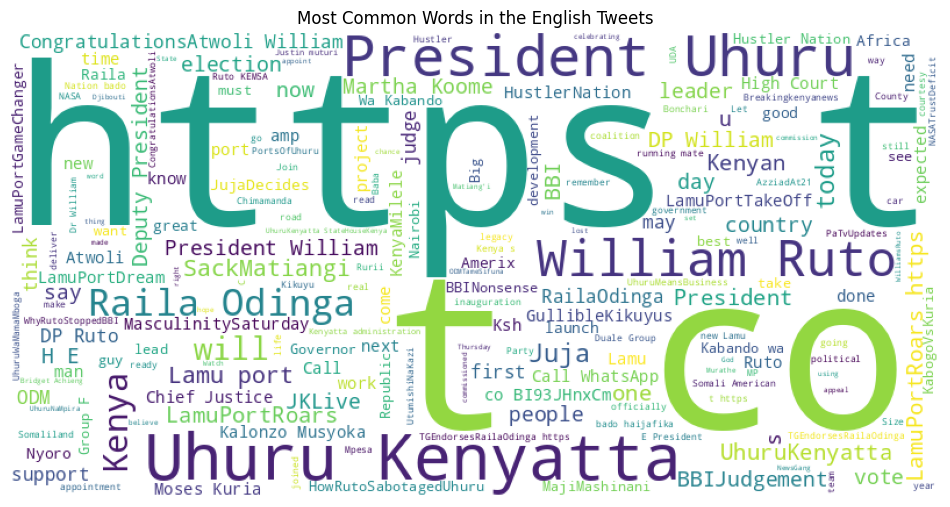

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(english_tweet_dataset['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Common Words in the English Tweets')
plt.show()